In [1]:
# LSTM분류기, YOLO 사진객체 추출

In [3]:
# 스팸메일 분류기
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# 자료는 여기서 받고 시작하자

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer         # 먼저 토큰으로 나누는 것이 우선이다. 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [94]:
data = pd.read_csv('spam.csv', encoding='latin1')                 # 신기하게도 라틴1으로 인코딩하면 깨지지 않는다. 

In [95]:
data#길이는 5572길이고 이름없는거 3열은 필요없어보인다. 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [96]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [97]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])  # 특정열의 값을 재정렬하는 것이다. 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [99]:
print('v2열의 유니크한 값 :',data['v2'].nunique())
# 생각보다 중복이 존재한다.
# 중복이 있을 때에는 

v2열의 유니크한 값 : 5169


In [100]:
data.drop_duplicates(subset=['v2'], inplace=True) # 중복제거를 따로 해보자.

In [101]:
data.groupby('v1').count() # 스팸메일은 653건이 존재한다. 
# smote기법으로 비율을 유지하는 것도 가능할 것이다.

,v2
v1,
0,4516
1,653


In [102]:
X_data = data['v2'] # 이것이 문제지일 것이다.
y_data = data['v1'] # 이것이 정답일 것이다. 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # stratify는 동일한 비율로 층화추출하여 나눌때 사용한다. 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [104]:
# 먼저 숫자로 토큰화를 시켜야할 필요성이 느껴진다. 
tokenizer = Tokenizer()
# 코퍼스에 있는 텍스트 데이터로부터 토크나이저를 생성해야한다. 

In [105]:
tokenizer.fit_on_texts(X_train)


In [106]:
tokenizer.index_word # 인덱스 워드는 각 단어에 부여된 번호를 확인할 수 있는 기능이다. 

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [107]:
tokenizer.word_counts # 단어 출현 빈도수이다. 
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer 
# 텐서플로 케라스 토크나이저이다.

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [108]:
len(tokenizer.index_word)     # 갯수는 7800개 가량이다. 
# 만약 갯수를 지정해서 저장하고 싶다면?

7821

In [109]:
X_train_encoded = tokenizer.texts_to_sequences(X_train) # 문장이 각 단어의 인덱스로 변환된 것을 확인할 수 있다. 
X_train_encoded # 숫자(정수)로 인코딩 되어있다.  

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [110]:
word_to_index = tokenizer.word_index

In [111]:
word_to_index  # 워드 인덱스와 인덱스 워드는 다르다. 
# 여기서 인덱스 순서는 가장 많이 등장한 빈도수를 기준으로 한다. 

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [112]:
tokenizer.word_counts.items() # 빈도수가 낮은 경우도 많이 있다. 
# 빈도수가 낮은 경우는 제거하는 것도 필요할 듯 하다. 

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [113]:
total_cnt = len(word_to_index)
total_cnt

7821

In [114]:
threshold = 2

In [115]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [116]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value                # 훈련데이터가 누적되었다. 
    if(value < threshold):                         # 만약 등장빈도수가 2보다 작으면?
        rare_cnt = rare_cnt + 1                    # 레어카운트를 늘린다. 
        rare_freq = rare_freq + value              # 레어값에 값을 추가한다.

In [117]:
total_freq

65145

In [118]:
rare_cnt                                           # 빈도수가 4300여개이다. 희귀단어이다. 

4337

In [119]:
rare_freq                                          # 희귀단어의 비중을 봐야할 것이다. 

4337

In [120]:
(rare_cnt/total_cnt)*100                           # 전체단어중에서 등장 빈도수가 1인 단어의 비율

55.45326684567191

In [121]:
(rare_freq/total_freq)*100                         # 등장빈도수가 1인 단어 등장비율 
# 등장빈도수가 낮은 단어는 제거해야할 수도 있다. 

6.65745644331875

In [122]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1) 
tokenizer_over2 

In [123]:
tokenizer_over2.fit_on_texts(X_train)

In [124]:
len(tokenizer_over2.index_word)

7821

In [125]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [126]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
# 최대 길이는 샘플에 담아서 최대길이를 확인한다. 

메일의 최대 길이 : 189


In [127]:
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
# 메일의 평균길이는 map함수를 적용해서 모든 리스트에 대해서 len 함수를 적용해서 모두 합한 것이다. 
#

메일의 평균 길이 : 15.754534


(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

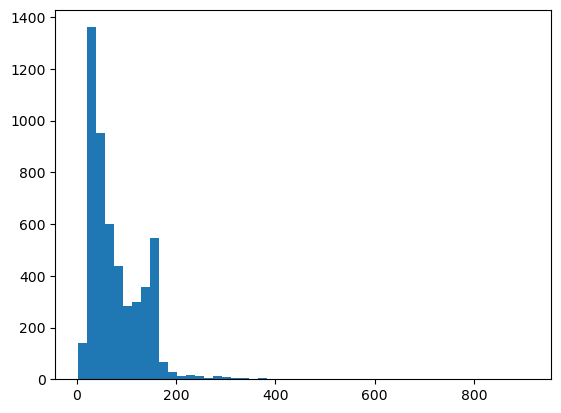

In [128]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [129]:
# 이제 RNN을 사용할 것이다. 길이를 동일하게 맞춰줘야 한다. 
X_train_padded = pad_sequences(X_train_encoded, maxlen = 189) # 모든 메일의 길이를 189로 정렬해야한다. 
X_train_padded.shape

(4135, 189)

In [130]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [131]:
vocab_size = len(word_to_index)+1 # 패딩 토큰에 0번을 사용해야 한다. 그래서 1을 더한다. 

In [132]:
model = Sequential()                           # 모델 제작
model.add(Embedding(vocab_size, embedding_dim))# vocab_size의 차원을 32차원으로 줄인다.
model.add(SimpleRNN(hidden_units))             # rnn셀은 32차원으로 출력한다는 것이다. 
model.add(Dense(1,activation='sigmoid'))       # 결과는 스팸여부를 구분하는 것이다. 


In [133]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/100
52/52 [==============================] - 2s 23ms/step - loss: 0.4713 - acc: 0.8014 - val_loss: 0.2737 - val_acc: 0.9565
Epoch 2/100
52/52 [==============================] - 1s 20ms/step - loss: 0.1643 - acc: 0.9613 - val_loss: 0.1030 - val_acc: 0.9746
Epoch 3/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0724 - acc: 0.9831 - val_loss: 0.0832 - val_acc: 0.9770
Epoch 4/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0497 - acc: 0.9861 - val_loss: 0.0721 - val_acc: 0.9782
Epoch 5/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0295 - acc: 0.9930 - val_loss: 0.0670 - val_acc: 0.9794
Epoch 6/100
52/52 [==============================] - 1s 20ms/step - loss: 0.1799 - acc: 0.9232 - val_loss: 0.1688 - val_acc: 0.9407
Epoch 7/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0591 - acc: 0.9834 - val_loss: 0.0779 - val_acc: 0.9807
Epoch 8/100
52/52 [==============================] - 1s 20ms/step - loss: 0.

KeyboardInterrupt: 

In [134]:
tokenizer.texts_to_sequences(X_test)
# 테스트셋도 똑같은 작업을 해야한다. 

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [135]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = 189)

In [136]:
model.predict(X_test_padded) # 시그모이드 형식으로 출력이 된 것이다. 

33/33 [==============================] - 0s 5ms/step


array([[4.041308e-03],
       [1.291933e-03],
       [9.958408e-01],
       ...,
       [5.277201e-04],
       [9.995058e-01],
       [9.827369e-03]], dtype=float32)

In [137]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.1105 - acc: 0.9671

 테스트 정확도: 0.9671


In [140]:
# 팀원별 메일 제목 / 분류결과 데이터셋 구성
# - 스팸메일 분류기
# - 메일 분류기 문제는 실용적이지도 않다. 
# 분류기는 다음과 같은 방식으로 진행한다.
# 토큰화 - 수치변환 - 패딩 - 모델입력 - 결과
# 감성분류 분석기를 만드는 연습을 해보자. 
# 2000년대 초반까지만 해도 코딩기술이 없던 시절 댓글을 일일이 복사해서 붙여넣었다.
# 감성단계도 숫자로 분류해서  붙였다. 공부를 안하면 몸이 고생한다. 
# 직접 모델에 대해 정성적 평가를 하고자 한다면?(정량적 평가-정확도 평가-가 아닌)
# 인공지능 분야중에 XAI(explainable AI)가 있다. 설명 가능한 AI이다. 
# AI가 결론을 내린 근거를 알아야 한다. 
# 뭘 하든지 최종목표는 자동화이다. 우리가 손을 대지 않아도 유지보수가 자동으로 되는 것을 원한다. 
# 데이터 수집 - 전처리 - 분석 - 시각화 - 모델링 - 예측결과확인 - 유지보수 - 배포 - 성능개선.. 
# 이 전체가 자동화되는 것이 최종 목표인 것이다. 
# 실시간으로 전송되는 이메일은 메일 분류기가 알아서 처리중이다. 
# 여기서 데이터베이스 영역으로 넘어간다. 테이블에서 진행될 것이다. 
# 1. 하루단위로 데이터를 수집한다고 하자. 스크래핑 기계로 데이터를 알아서 모으게 할 수 있을 것이다. 
# 2. 이 텍스트를 자동으로 전처리하는 과정을 구현해야할 것이다. 
# 3. 기존 모델이 존재할 것이다. 새롭게 수집된 데이터를 추가하여 학습을 해야한다. 
# 모델을 아예 새로 만들거나 기존 모델을 파인튜닝을 하거나. 둘 중 하나이다. 
# 일반적으로 모델을 파인튜닝하여 개선한다. 
# 시그모이드는 문제가 존재한다. 0.49는 0으로 분류되고 0.5는 1로 분류된다. 매우 미세한 차이로 분류될 수 있다.
# 여기서 애러가 많이 발생한다. 여기서 틀리는 경우가 많이 나온다. 때로는 시그모이드를 직접 확인할 필요성이 있다.
# 0 아니면 1에서 출력을 해야하는데 0.5를 출력했다는 것은 모르겠다는 이야기이다. 

In [214]:
# 오늘은 YOLO를 할 것이다. 
from konlpy.tag import Okt

In [264]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 

In [216]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
# 네이버쇼핑리뷰이다.

('ratings_total.txt', <http.client.HTTPMessage at 0x2b9eb45e6d0>)

In [308]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [309]:
total_data = total_data.head(10000) # 20만개의 리뷰가 있다. 1만건만 쓰자

In [310]:
np.select([total_data.ratings>3],[1])                            # 넘파이에 셀렉트라는 함수가 존재한다. 
# 3보다 큰 경우는 1로 변하고 아니면 0이 된다. 조건에 맞으면 1이 된다.

array([1, 0, 1, ..., 0, 0, 0])

In [311]:
x = np.arange(10)
np.select([x<3],[x**2])             # 넘파이 셀렉트는 꽤 재밌는 함수이다. 1,0으로 보일 수 있고 내용을 곱할 수도 있다. 

array([0, 1, 4, 0, 0, 0, 0, 0, 0, 0])

In [312]:
x = np.arange(10)
np.select([x<3],[x**2],default=999) # 디폴트는 0이다. 이걸 999로 수정하였다. 

array([  0,   1,   4, 999, 999, 999, 999, 999, 999, 999])

In [313]:
x = np.arange(10)
np.select([x<3,x>7],[x**2,x**3],default=999) # 디폴트는 0이다. 이걸 999로 수정하였다. 

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

In [314]:
total_data['lable']=np.select([total_data.ratings>3],[1],default= 0 )  # 이걸 이용해볼 것이다. 

In [315]:
total_data['ratings'].value_counts() # 중간이 없는 신기한 자료이다. 

ratings
5    3995
2    3223
1    1799
4     983
Name: count, dtype: int64

In [316]:
total_data['reviews'].nunique()# 리뷰에 대해 몇 개의 중복이 존재하긴 한다. 

10000

In [317]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)

In [318]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [319]:
train_data['lable'].value_counts()#재밌게도 반반 나눠졌다. 
# 한글하고 공백을 제외한 다른 문자를 제거해보자.

lable
0    3753
1    3747
Name: count, dtype: int64

In [320]:
train_data['reviews']
# 문제는 숫자가 중요할 수도 있다. 만약 필요하다고 생각된다면 숫자를 묶어버릴 수도 있다. 
# 띄어쓰기도 안되어있다.
# 네이버에 맞춤법 검사기가 있다. 그 API를 쓰면 깔끔하게 나온다. 
# ㅋㅋ, ㅠㅠ, ㄷㄷ 이것은 이모티콘을 글자로 쓴 것이다. 긍정, 부정의 뜻 모두가 된다. 
# 오타도 많고 불편하다. 맞춤법을 불편해하는 사람이 있으면 매우 불편할 것이다. 
# 앞에는 긍정하다가 뒤에서 부정해버리거나 그 반대의 경우도 많이 존재한다. 
# 세부작업이 많이 필요하다. 꽤 골치아프다. 
# 정규표현식을 사용해서 제거해야 할 것이다. 
# 

4901                     두께가 좀 얇네요. 물을 많이 흡수 할 수 있을까 싶어요.
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요 ? 아무리봐도 덜박은거 같거든요...... 바느질했다가 뜯어진...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                  재구매 네번째 재구매 상품입니다~~
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 '삼가 고인의 ...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요~ 매우 실망입니다.. 맛도 1년전에 지인을 통해 ...
Name: reviews, Length: 7500, dtype: object

In [321]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 리뷰에 텍스트가 없는 경우도 존재한다. 빈 문자열로만 저장되어져 있는 경우가 존재한다.
# 만약 빈 문자열로 저장되어져 있는 경우 Nan으로 대체하고자 한다면 replace 함수를 사용할 수 있다.

In [322]:
train_data['reviews'].replace("",np.nan,inplace=True)

In [323]:
train_data.isnull().sum() # 결측값이 존재하지 않는 것을 확인했다. 
# 중복을 제거하는 작업을 수행해야 한다. 

ratings    0
reviews    0
lable      0
dtype: int64

In [324]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['reviews'].replace("", np.nan, inplace=True)
# 테스트 데이터에 대해서도 같은 작업을 한다. 

In [325]:
test_data = test_data.dropna(how='any') # 기본적인 전처리를 끝냈다.

In [326]:
test_data

,ratings,reviews,lable
6252,5,ㅎㅎ 가격에 비해 저렴하고 좋네요ㅎㅎ다음에 기회가 되면 또 구해 하겟습니다 번창하세...,1
4684,1,배송이 15일걸린듯,0
1731,5,너무 좋아요 그리고 좋아요 그리고 좋아요,1
4742,4,검댕이는 묻어나지만 냄새는 다빠졌어요,1
4521,2,별로예요... ㅜㅜ 너무 약해서 한번쓰고 버렸습니다.,0
...,...,...,...
4862,1,허리가 말도안되게작아서 못입겠어요,0
7025,1,상품배송할때 제품검수좀 하고 보내세요 의자 발 4센치는 옮폭 파여서 왔던데 환불할려...,0
7647,4,좀 얇다는 점이 아쉽네요.,1
7161,4,촉촉하고 건조하지 않습니다. 저렴하게 구매해서 만족합니다.,1


In [327]:
from konlpy.tag import Okt   
okt = Okt()


In [328]:
okt.morphs('배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요')

['배송',
 '도',
 '빠르네요',
 '가격',
 '대비',
 '좋은',
 '것',
 '같아요',
 '~~~',
 '첨',
 '에는',
 '힘들어하나',
 '조금',
 '지나니',
 '잘',
 '하네요']

In [329]:
okt.pos('배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요')
# 대부분 조사는 의미가 없다. 일반적으로는 명사,동사만 남기는 경우가 많다. 
# https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0 
# 현재의 사이트에서 확인이 가능하다. 

[('배송', 'Noun'),
 ('도', 'Josa'),
 ('빠르네요', 'Adjective'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('좋은', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('~~~', 'Punctuation'),
 ('첨', 'Noun'),
 ('에는', 'Josa'),
 ('힘들어하나', 'Adjective'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [239]:
pree = okt.pos('배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요')
len(pree)
NV = []
for i in range(len(pree)):
    if pree[i][1] == 'Noun' or pree[i][1] == 'Verb':
        NV.append(pree[i])
NV

[('배송', 'Noun'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('것', 'Noun'),
 ('첨', 'Noun'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [206]:
def MyangDong(dan):
    pree = okt.pos(dan)
    NV = []
    for i in range(len(pree)):
        if pree[i][1] == 'Noun' or pree[i][1] == 'Verb':
            NV.append(pree[i])
    return NV

In [210]:
NV = []
NV.append(test_data['reviews'].map(MyangDong))

KeyboardInterrupt: 

In [330]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','.','..']

In [331]:
['tokenized']=train_data['reviews'].apply(okt.morphs)

In [332]:
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [333]:
from collections import Counter # 빈도수가 낮은 수를 찾기 위해 카운터 함수를 쓰자

In [334]:
listy = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [335]:
Counter(listy)                                   #리스트를 추가하면 단어의 빈도수를 확이내준다. 

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [336]:
negative_words = train_data[train_data.lable == 0].values        # 밸류즈는 현재의 값을 배열로 나타낸다. 

In [337]:
positive_words = train_data[train_data.lable == 1].values       # 긍정 비율이다.

In [338]:
negative_words = np.hstack(train_data[train_data.lable==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.lable==1]['tokenized'].values)

In [339]:
Counter(negative_words)       

Counter({'..': 750,
         '안': 620,
         '너무': 589,
         '요': 588,
         '...': 500,
         '배송': 449,
         '그냥': 435,
         '잘': 429,
         '했는데': 294,
         '구매': 287,
         '로': 286,
         '제품': 283,
         '못': 282,
         '으로': 278,
         '별로': 269,
         '좀': 266,
         '하고': 261,
         '생각': 250,
         '사용': 243,
         '보다': 235,
         'ㅠㅠ': 231,
         '만': 227,
         '맛': 212,
         'ㅠ': 204,
         '개': 203,
         '주문': 200,
         ',': 198,
         '많이': 191,
         '가격': 191,
         '?': 186,
         '입니다': 182,
         '재구매': 178,
         '해서': 177,
         '같아요': 174,
         '서': 171,
         '반품': 168,
         '상품': 168,
         '때': 167,
         '부분': 159,
         '냄새': 157,
         '다른': 157,
         '에서': 152,
         '것': 147,
         '하나': 143,
         '사이즈': 139,
         '더': 134,
         '~': 131,
         '거': 127,
         '제': 126,
         '샀는데': 126,
         '포장

In [340]:
Counter(positive_words)  

Counter({'잘': 769,
         '좋아요': 686,
         '배송': 584,
         '재구매': 473,
         '~': 471,
         '너무': 443,
         '구매': 359,
         '요': 327,
         '!': 301,
         '사용': 258,
         '가격': 238,
         '으로': 228,
         '같아요': 224,
         '좋네요': 220,
         '^^': 199,
         '보다': 198,
         '입니다': 192,
         '주문': 186,
         '로': 186,
         '제품': 182,
         '빠르고': 177,
         '때': 173,
         '..': 172,
         ',': 168,
         '더': 166,
         '좋습니다': 165,
         '하고': 161,
         '생각': 161,
         '했어요': 159,
         '했는데': 158,
         '맛': 151,
         '합니다': 150,
         '~~': 147,
         '만족합니다': 145,
         '것': 145,
         '해서': 139,
         'ㅎㅎ': 139,
         '좀': 135,
         '좋고': 135,
         '사이즈': 133,
         '안': 132,
         '좋은': 132,
         '아주': 131,
         '많이': 130,
         '또': 127,
         '감사합니다': 125,
         '정말': 122,
         '거': 120,
         '아직': 117,
         '포장': 1

In [341]:
negative_word_count = Counter(negative_words)

In [342]:
Counter(positive_words)
positive_word_count = Counter(positive_words)

In [343]:
positive_word_count

Counter({'잘': 769,
         '좋아요': 686,
         '배송': 584,
         '재구매': 473,
         '~': 471,
         '너무': 443,
         '구매': 359,
         '요': 327,
         '!': 301,
         '사용': 258,
         '가격': 238,
         '으로': 228,
         '같아요': 224,
         '좋네요': 220,
         '^^': 199,
         '보다': 198,
         '입니다': 192,
         '주문': 186,
         '로': 186,
         '제품': 182,
         '빠르고': 177,
         '때': 173,
         '..': 172,
         ',': 168,
         '더': 166,
         '좋습니다': 165,
         '하고': 161,
         '생각': 161,
         '했어요': 159,
         '했는데': 158,
         '맛': 151,
         '합니다': 150,
         '~~': 147,
         '만족합니다': 145,
         '것': 145,
         '해서': 139,
         'ㅎㅎ': 139,
         '좀': 135,
         '좋고': 135,
         '사이즈': 133,
         '안': 132,
         '좋은': 132,
         '아주': 131,
         '많이': 130,
         '또': 127,
         '감사합니다': 125,
         '정말': 122,
         '거': 120,
         '아직': 117,
         '포장': 1

긍정 리뷰의 평균 길이 : 11.487590072057646
부정 리뷰의 평균 길이 : 15.363176125766055


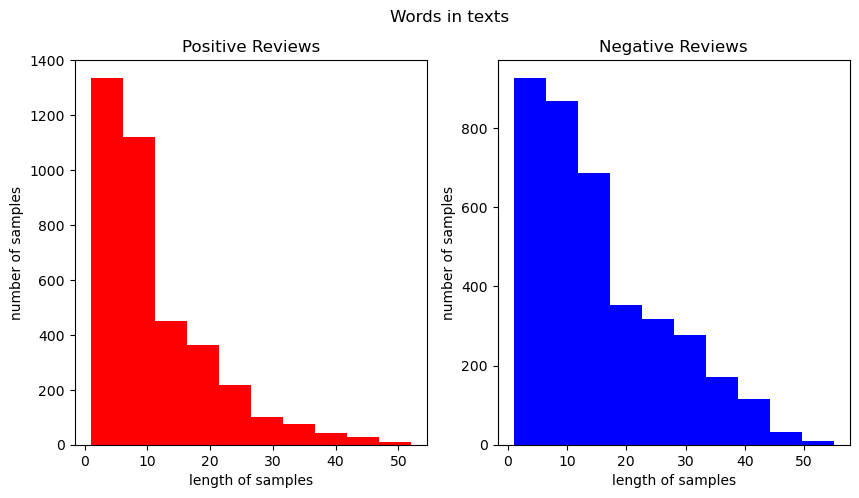

In [344]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['lable']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')                                  # 긍정부의 히스토그램이다. 
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['lable']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')                                 # 부정부의 히스토그램이다. 
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))              # 부정리뷰의 길이는 꽤 긴 특징이 있다. 
plt.show()

In [345]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [346]:
X_train = train_data['tokenized'].values
y_train = train_data['lable'].values
X_test= test_data['tokenized'].values
y_test = test_data['lable'].values

In [347]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [348]:
tokenizer.word_index

{'잘': 1,
 '배송': 2,
 '너무': 3,
 '..': 4,
 '요': 5,
 '안': 6,
 '좋아요': 7,
 '재구매': 8,
 '구매': 9,
 '~': 10,
 '...': 11,
 '으로': 12,
 '사용': 13,
 '그냥': 14,
 '로': 15,
 '제품': 16,
 '했는데': 17,
 '보다': 18,
 '가격': 19,
 '하고': 20,
 '생각': 21,
 '좀': 22,
 '같아요': 23,
 '주문': 24,
 '입니다': 25,
 ',': 26,
 '맛': 27,
 '!': 28,
 '못': 29,
 '때': 30,
 '많이': 31,
 '만': 32,
 '해서': 33,
 '더': 34,
 '별로': 35,
 '것': 36,
 '개': 37,
 '합니다': 38,
 '사이즈': 39,
 'ㅠㅠ': 40,
 '에서': 41,
 '서': 42,
 '거': 43,
 '상품': 44,
 '포장': 45,
 '다른': 46,
 '좋네요': 47,
 '냄새': 48,
 '?': 49,
 'ㅠ': 50,
 '정말': 51,
 '하나': 52,
 '^^': 53,
 '했어요': 54,
 '부분': 55,
 '진짜': 56,
 '빠르고': 57,
 '조금': 58,
 '할': 59,
 '~~': 60,
 '제': 61,
 '나': 62,
 '넘': 63,
 '샀는데': 64,
 '저': 65,
 '인데': 66,
 '이라': 67,
 '구입': 68,
 '좋습니다': 69,
 '좋은': 70,
 '반품': 71,
 '또': 72,
 '사진': 73,
 '두': 74,
 '정도': 75,
 '해': 76,
 '만족합니다': 77,
 'ㅎㅎ': 78,
 '완전': 79,
 '느낌': 80,
 '아주': 81,
 '좋고': 82,
 '아직': 83,
 '딱': 84,
 '써': 85,
 '아이': 86,
 '맘': 87,
 '2': 88,
 '다시': 89,
 '엄청': 90,
 '....': 91,
 '감사합니다': 92,
 '중': 

In [349]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17395
등장 빈도가 1번 이하인 희귀 단어의 수: 10386
단어 집합에서 희귀 단어의 비율: 59.70681230238575
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.313598538261406


In [350]:
vocab_size = total_cnt - rare_cnt + 2          # 2를 더한 이유는 0이라는 패딩토큰에 OOV 토큰 하나가 더 추가되었기 때문이다
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7011


In [351]:
# 예를 들어 '나는 오늘 학교에 갔습니다.'' 라는 단어가 있다고 하자.
# 그런데 사전에 '오늘'이라는 단어가 사전에 없다고 해보자. 
# 그렇다면 사전에 없는 단어가 출현하면 OOV에 담아버리는 것이다. 
# 즉 threshhold의 값에 따라 다르다. 
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# 문제는 테스트 데이터에 OOV가 더 많을 가능성이 있다. 
# 그래도 테스트데이터에 존재하지 않더라도 훈련을 위해서는 훈련데이터만 쓰는 것이다. 
# 신조어나 은어는 OOV가 나올 것이다. 

In [352]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [353]:
tokenizer.word_index # OOV가 가장 많이 나온다는 뜻이다. 

{'OOV': 1,
 '잘': 2,
 '배송': 3,
 '너무': 4,
 '..': 5,
 '요': 6,
 '안': 7,
 '좋아요': 8,
 '재구매': 9,
 '구매': 10,
 '~': 11,
 '...': 12,
 '으로': 13,
 '사용': 14,
 '그냥': 15,
 '로': 16,
 '제품': 17,
 '했는데': 18,
 '보다': 19,
 '가격': 20,
 '하고': 21,
 '생각': 22,
 '좀': 23,
 '같아요': 24,
 '주문': 25,
 '입니다': 26,
 ',': 27,
 '맛': 28,
 '!': 29,
 '못': 30,
 '때': 31,
 '많이': 32,
 '만': 33,
 '해서': 34,
 '더': 35,
 '별로': 36,
 '것': 37,
 '개': 38,
 '합니다': 39,
 '사이즈': 40,
 'ㅠㅠ': 41,
 '에서': 42,
 '서': 43,
 '거': 44,
 '상품': 45,
 '포장': 46,
 '다른': 47,
 '좋네요': 48,
 '냄새': 49,
 '?': 50,
 'ㅠ': 51,
 '정말': 52,
 '하나': 53,
 '^^': 54,
 '했어요': 55,
 '부분': 56,
 '진짜': 57,
 '빠르고': 58,
 '조금': 59,
 '할': 60,
 '~~': 61,
 '제': 62,
 '나': 63,
 '넘': 64,
 '샀는데': 65,
 '저': 66,
 '인데': 67,
 '이라': 68,
 '구입': 69,
 '좋습니다': 70,
 '좋은': 71,
 '반품': 72,
 '또': 73,
 '사진': 74,
 '두': 75,
 '정도': 76,
 '해': 77,
 '만족합니다': 78,
 'ㅎㅎ': 79,
 '완전': 80,
 '느낌': 81,
 '아주': 82,
 '좋고': 83,
 '아직': 84,
 '딱': 85,
 '써': 86,
 '아이': 87,
 '맘': 88,
 '2': 89,
 '다시': 90,
 '엄청': 91,
 '....': 92,
 '감사합니다'

In [354]:
print(tokenizer.word_index)

{'OOV': 1, '잘': 2, '배송': 3, '너무': 4, '..': 5, '요': 6, '안': 7, '좋아요': 8, '재구매': 9, '구매': 10, '~': 11, '...': 12, '으로': 13, '사용': 14, '그냥': 15, '로': 16, '제품': 17, '했는데': 18, '보다': 19, '가격': 20, '하고': 21, '생각': 22, '좀': 23, '같아요': 24, '주문': 25, '입니다': 26, ',': 27, '맛': 28, '!': 29, '못': 30, '때': 31, '많이': 32, '만': 33, '해서': 34, '더': 35, '별로': 36, '것': 37, '개': 38, '합니다': 39, '사이즈': 40, 'ㅠㅠ': 41, '에서': 42, '서': 43, '거': 44, '상품': 45, '포장': 46, '다른': 47, '좋네요': 48, '냄새': 49, '?': 50, 'ㅠ': 51, '정말': 52, '하나': 53, '^^': 54, '했어요': 55, '부분': 56, '진짜': 57, '빠르고': 58, '조금': 59, '할': 60, '~~': 61, '제': 62, '나': 63, '넘': 64, '샀는데': 65, '저': 66, '인데': 67, '이라': 68, '구입': 69, '좋습니다': 70, '좋은': 71, '반품': 72, '또': 73, '사진': 74, '두': 75, '정도': 76, '해': 77, '만족합니다': 78, 'ㅎㅎ': 79, '완전': 80, '느낌': 81, '아주': 82, '좋고': 83, '아직': 84, '딱': 85, '써': 86, '아이': 87, '맘': 88, '2': 89, '다시': 90, '엄청': 91, '....': 92, '감사합니다': 93, '중': 94, '면': 95, '에요': 96, '1': 97, '비': 98, '색상': 99, '라': 100, '용': 101, '!!': 102,

리뷰의 최대 길이 : 55
리뷰의 평균 길이 : 13.426933333333332


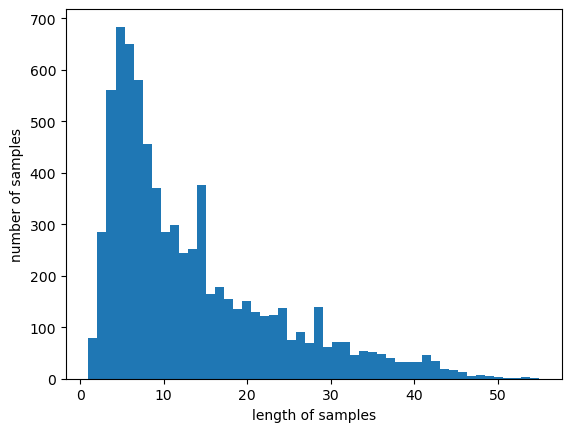

In [355]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [356]:
X_train = pad_sequences(X_train, maxlen = 55)  # 타임스텝이 55이다. 
X_test = pad_sequences(X_test, maxlen = 55)     # 임베딩을 위해서 패딩을 한다. 

In [357]:
# 100차원으로 임베딩을 한다음 lstm셀에 투입할 것이다. 이후 덴스로 결과를 출력한다.
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [358]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [359]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [360]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5778 - acc: 0.6942
Epoch 1: val_acc improved from -inf to 0.82400, saving model to best_model.h5
100/100 [==============================] - 6s 46ms/step - loss: 0.5778 - acc: 0.6942 - val_loss: 0.4246 - val_acc: 0.8240
Epoch 2/15
  3/100 [..............................] - ETA: 3s - loss: 0.3803 - acc: 0.8667

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 0.3350 - acc: 0.8729
Epoch 2: val_acc improved from 0.82400 to 0.84867, saving model to best_model.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.3352 - acc: 0.8728 - val_loss: 0.3573 - val_acc: 0.8487
Epoch 3/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2485 - acc: 0.9135
Epoch 3: val_acc improved from 0.84867 to 0.86400, saving model to best_model.h5
100/100 [==============================] - 4s 37ms/step - loss: 0.2488 - acc: 0.9130 - val_loss: 0.3486 - val_acc: 0.8640
Epoch 4/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1949 - acc: 0.9333
Epoch 4: val_acc did not improve from 0.86400
100/100 [==============================] - 4s 37ms/step - loss: 0.1952 - acc: 0.9330 - val_loss: 0.3559 - val_acc: 0.8620
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1612 - acc: 0.9473
Epoch 5: val_acc did not improve from 0.86400
100/100 [==================

In [361]:
loaded_model = load_model('best_model.h5')

In [362]:
loaded_model.evaluate(X_test, y_test) # 꽤 정확도가 괜찮다. 

79/79 [==============================] - 1s 13ms/step - loss: 0.3548 - acc: 0.8624


[0.3548256754875183, 0.8623999953269958]

In [363]:
# 문제. 이 제품은 너무 좋은데요. 정말 좋아요. 강추합니다. 이런 댓글을 입력했을때 긍정인지 부정인지 출력하는 것을 만들어라.
# 이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다.
# 함수를 만들어서 언어를 전달받아서 리턴결과가 긍정인지 부정인지 출력하라. 

In [ ]:
# YOLO
# 일종의 모델이다. 객체를 감지 / 추출하는 것이 주 목적이다. 
# 이미 사전에 학습이 되어져 있는 모델이다. 
# 이걸 이용한다는 것은 이미 학습되어져있는 모델로 분류한다는 것이다. 
# 사람인지 의자인지 분류할 수 있다는 것이다. 
# 물론 사람을 식별한다는 것 뿐이지 누군지는 모른다. 
# 파인튜닝을 이용하여 추가학습을 하는 것이다. 
# 
# 순서는 다음과 같다.
# 1. 이미지를 네모로 묶고 이 사람은 누구라고 알려주는 것이다. 이것이 AI 노가다이다. 
# 2. 이러한 사진을 여러 가지를 준비하는 것이다. 그러면 사진으로 누구인지 바로 알아볼 수 있다. 
# 3. 실시간 영상에서도 이 사람들이 누구인지 알 수 있을 것이다. 
# 4. 카메라 영상에서 찾는 것이 가능해질 것이다. 작업이 그렇게 나눠진다.
# 5. 이것이 파인튜닝이다. 미세조정인 것이다. 